In [388]:
import pandas as pd
import cdsapi
import atlite
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [389]:
df = pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_Central',skiprows=4)
df = df.merge(pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_North',skiprows=4))
print(df.columns)

Index(['REF', 'BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]',
       'NED-N[R1_NED-N(MW)]', 'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]',
       'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')


In [390]:
### Aggreate to hourly data by using mean function ###
df['index_time'] = pd.to_datetime(df["REF"].dt.strftime('%Y-%m-%d-%H'))
df = df.drop(columns=['REF'])
df = df.groupby(by=["index_time"], dropna=False).mean()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35065 entries, 2019-01-01 00:00:00 to 2023-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BCPG-N[MCC_BCP-N(MW)]  35065 non-null  float64
 1   EAN-N[R4_EAN-N(MW)]    35065 non-null  float64
 2   NED-N[R1_NED-N(MW)]    35065 non-null  float64
 3   SSP-N[R1_SSP-N(MW)]    35065 non-null  float64
 4   EAL-N[R4_EAL-N(MW)]    35065 non-null  float64
 5   EAP-N[R4_EAP-N(MW)]    35065 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB
None


In [391]:
### To cap the generation by installed capacity  ###
print(df.columns)

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')


In [392]:
installed_capacity = [
    34.2,
    126.126,
    73,
    52,
    128.396,
    133.92
]

for i in range(len(df.columns)):
    df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
    df[df.columns[i]] = df[df.columns[i]]/installed_capacity[i]


data_actual = df.copy()
print(data_actual.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35065 entries, 2019-01-01 00:00:00 to 2023-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BCPG-N[MCC_BCP-N(MW)]  35065 non-null  float64
 1   EAN-N[R4_EAN-N(MW)]    35065 non-null  float64
 2   NED-N[R1_NED-N(MW)]    35065 non-null  float64
 3   SSP-N[R1_SSP-N(MW)]    35065 non-null  float64
 4   EAL-N[R4_EAL-N(MW)]    35065 non-null  float64
 5   EAP-N[R4_EAP-N(MW)]    35065 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB
None


C:\Users\595078\AppData\Local\Temp\ipykernel_62036\1061966536.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
C:\Users\595078\AppData\Local\Temp\ip

In [393]:
df = pd.DataFrame()
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2019_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
# df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2020_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2021_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2022_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = df.set_index('time_utcadj')

year = 2021
df = df.loc[df.index.year == year]
data_actual = data_actual.loc[data_actual.index.year == year]


In [394]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

<Axes: xlabel='time_utcadj'>

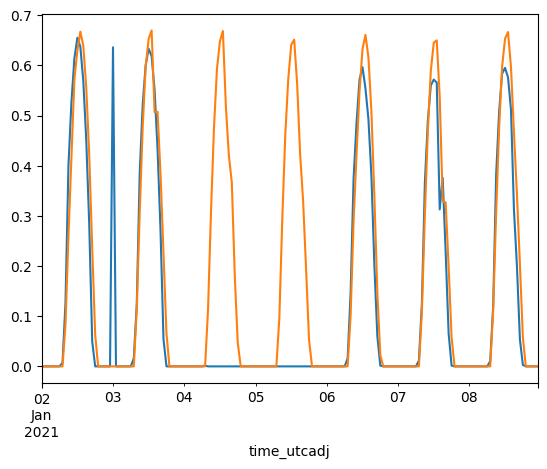

In [395]:
i = 0
day = 1
data_actual[name_list[i]][(day*24):((day*24)+(24*7))].plot()
df[name_list[i]][(day*24):((day*24)+(24*7))].plot()


In [396]:
for i in name_list:
    print(i)
    print('Acutal PF = ',np.round(data_actual[i].sum() * 100 /len(data_actual),4))
    print('ERA5 PF = ',np.round(df[i].sum() * 100 /len(df),4))
    print('')

BCPG-N[MCC_BCP-N(MW)]
Acutal PF =  13.4014
ERA5 PF =  16.5549

EAN-N[R4_EAN-N(MW)]
Acutal PF =  16.6139
ERA5 PF =  17.0227

NED-N[R1_NED-N(MW)]
Acutal PF =  16.4297
ERA5 PF =  16.9516

SSP-N[R1_SSP-N(MW)]
Acutal PF =  18.0565
ERA5 PF =  16.9516

EAL-N[R4_EAL-N(MW)]
Acutal PF =  18.3435
ERA5 PF =  16.4406

EAP-N[R4_EAP-N(MW)]
Acutal PF =  19.2204
ERA5 PF =  16.8955



In [397]:
for i in name_list:
    print(i)
    print('Acutal Gen = ',np.round(data_actual[i].sum(),4))
    print('ERA5 Gen = ',np.round(df[i].sum(),4))
    print('Diff from actual percen  = ', np.round((df[i].sum() - data_actual[i].sum())*100/data_actual[i].sum(),1))
    print('')

BCPG-N[MCC_BCP-N(MW)]
Acutal Gen =  1173.9591
ERA5 Gen =  1450.2079
Diff from actual percen  =  23.5

EAN-N[R4_EAN-N(MW)]
Acutal Gen =  1455.3736
ERA5 Gen =  1491.187
Diff from actual percen  =  2.5

NED-N[R1_NED-N(MW)]
Acutal Gen =  1439.2438
ERA5 Gen =  1484.9616
Diff from actual percen  =  3.2

SSP-N[R1_SSP-N(MW)]
Acutal Gen =  1581.749
ERA5 Gen =  1484.9616
Diff from actual percen  =  -6.1

EAL-N[R4_EAL-N(MW)]
Acutal Gen =  1606.8892
ERA5 Gen =  1440.2002
Diff from actual percen  =  -10.4

EAP-N[R4_EAP-N(MW)]
Acutal Gen =  1683.7033
ERA5 Gen =  1480.046
Diff from actual percen  =  -12.1



In [398]:
gen_difffromactual = pd.DataFrame()
for i in name_list:
    gen_actual_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()) for j in range(12)]
    gen_era5_month_list = [(df[i].loc[df.index.month == (j+1)].sum()) for j in range(12)]
    gen_difffromactual_list = [(gen_era5_month_list[j] - gen_actual_month_list[j]) for j in range(12)]
    gen_difffromactual[i] = pd.DataFrame(gen_difffromactual_list)
print(np.round(gen_difffromactual,1))

    BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    39.7                 12.0                 16.3   
1                    30.4                 11.9                 22.7   
2                    31.2                 19.9                 16.7   
3                    28.2                  7.3                  7.4   
4                    18.9                  5.5                  0.3   
5                    -1.5                 -6.3                -16.3   
6                     9.1                 -2.4                 -3.7   
7                    35.4                 -1.1                  4.4   
8                    19.7                -10.5                 -8.5   
9                    13.0                  1.5                  0.7   
10                    8.2                  2.1                 -1.7   
11                   44.0                 -4.0                  7.5   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N(MW)]  
0       

In [399]:
plantfactor_actual_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_actual_monthly[i] = pd.DataFrame(pf_month_list)

print("pf actual = ",np.round(plantfactor_actual_monthly*100,1))

pf actual =      BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    14.0                 18.4                 17.8   
1                    15.6                 18.8                 17.4   
2                    15.4                 17.1                 17.5   
3                    13.3                 16.5                 16.0   
4                    15.2                 17.7                 18.2   
5                    15.3                 15.9                 17.6   
6                    13.1                 15.2                 15.4   
7                    10.4                 16.1                 15.4   
8                     9.5                 14.2                 13.9   
9                    12.8                 14.2                 14.6   
10                   14.3                 16.6                 16.2   
11                   12.0                 18.7                 17.2   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N(MW

In [400]:
plantfactor_era5_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_era5_monthly[i] = pd.DataFrame(pf_month_list)

print("pf era5 = ",np.round(plantfactor_era5_monthly*100,1))

pf era5 =      BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    19.3                 20.0                 20.0   
1                    20.1                 20.5                 20.8   
2                    19.6                 19.8                 19.7   
3                    17.2                 17.5                 17.0   
4                    17.7                 18.4                 18.3   
5                    15.1                 15.1                 15.3   
6                    14.4                 14.9                 14.9   
7                    15.2                 15.9                 16.0   
8                    12.3                 12.8                 12.7   
9                    14.6                 14.4                 14.7   
10                   15.4                 16.9                 16.0   
11                   17.9                 18.2                 18.2   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N(MW)]

In [401]:
plantfactor_difffromactual = pd.DataFrame()
for i in name_list:
    pf_actual_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    pf_era5_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    pf_difffromactual_list = [( pf_era5_month_list[j] - pf_actual_month_list[j] ) / pf_actual_month_list[j] for j in range(12)]
    plantfactor_difffromactual[i] = pd.DataFrame(pf_difffromactual_list)
print(np.round(plantfactor_difffromactual*100,1))

    BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    38.0                  8.8                 12.3   
1                    28.9                  9.4                 19.5   
2                    27.3                 15.6                 12.8   
3                    29.4                  6.1                  6.4   
4                    16.7                  4.1                  0.2   
5                    -1.4                 -5.5                -12.9   
6                     9.3                 -2.1                 -3.2   
7                    45.6                 -0.9                  3.8   
8                    28.7                -10.3                 -8.5   
9                    13.6                  1.5                  0.6   
10                    8.0                  1.7                 -1.5   
11                   49.2                 -2.9                  5.8   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N(MW)]  
0       

Measure, time series similarity

In [402]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

In [403]:
name_index = 0

ts = pd.DataFrame()
ts['actual'] = data_actual[name_list[name_index]]
ts['era5'] = df[name_list[name_index]]
print(name_list[name_index])
ts.info()

BCPG-N[MCC_BCP-N(MW)]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   actual  8760 non-null   float64
 1   era5    8760 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


In [404]:
## Pearson Correlation ##
print('plant = ', name_list[name_index])
ts.corr()

plant =  BCPG-N[MCC_BCP-N(MW)]


,actual,era5
actual,1.000000,0.831587
era5,0.831587,1.000000


In [405]:
import numpy as np

def calc_euclidean(actual, predic):
    return np.sqrt(np.sum((actual - predic) ** 2))

def calc_mape(actual, predic):
    return np.mean(np.abs((actual - predic) / actual))

print('plant = ', name_list[name_index])
print('calc_euclidean = ',calc_euclidean(ts['actual'],ts['era5']))
print('calc_mape = ',calc_mape(ts['actual']+1,ts['era5']+1))

plant =  BCPG-N[MCC_BCP-N(MW)]
calc_euclidean =  12.135259818932948
calc_mape =  0.053616704308337884


plant =  BCPG-N[MCC_BCP-N(MW)]
          actual      era5
actual  0.000000  5.469655
era5    5.469655  0.000000


C:\Users\595078\AppData\Local\Temp\ipykernel_62036\3013203574.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()


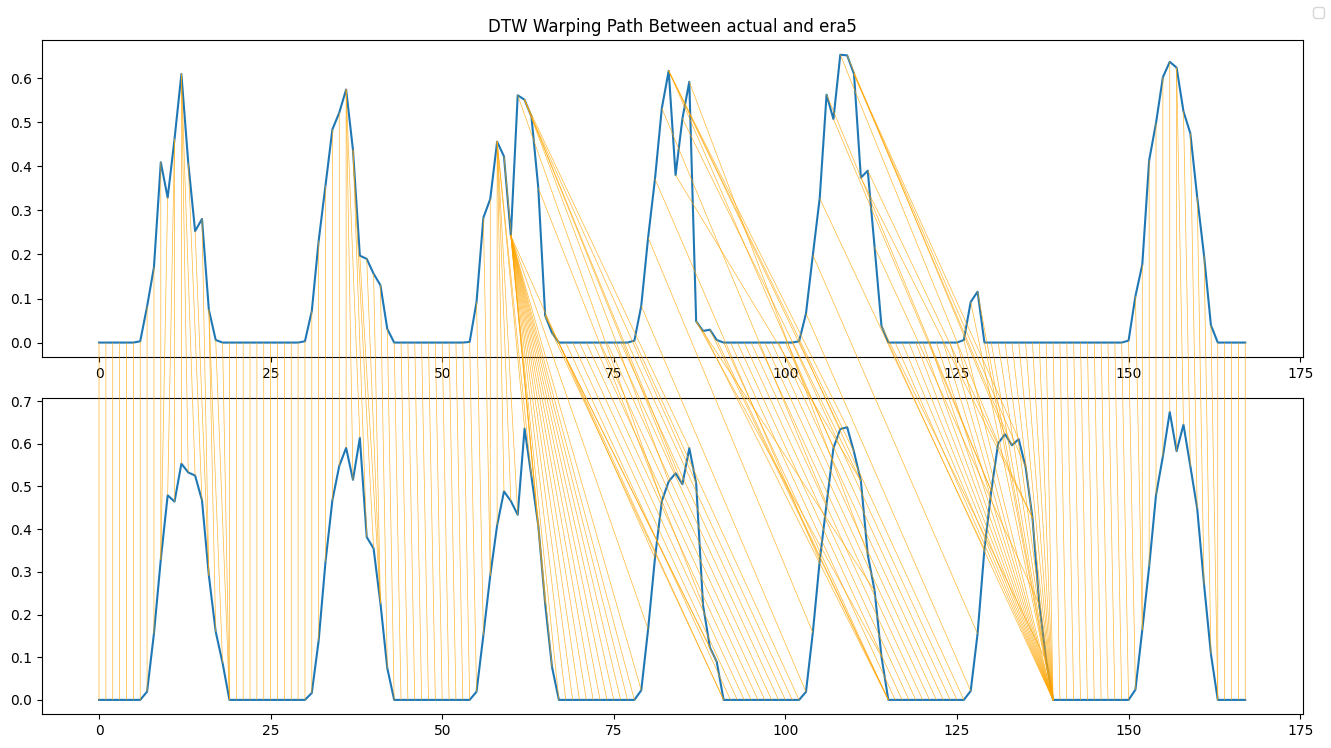

In [407]:
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw

print('plant = ', name_list[name_index])
dtw_dist = dtw.distance_matrix_fast(ts.T.values)
print(pd.DataFrame(dtw_dist, index=ts.columns, columns=ts.columns))

day = 100
fig, ax = plt.subplots(2,1,figsize=(1280/96, 720/96))
path = dtw.warping_path(ts['actual'][(day*24):((day*24)+(24*7))].values, ts['era5'][(day*24):((day*24)+(24*7))].values)
dtwvis.plot_warping(ts['actual'][(day*24):((day*24)+(24*7))].values, ts['era5'][(day*24):((day*24)+(24*7))].values, path, 
                    fig=fig, axs=ax)
ax[0].set_title('DTW Warping Path Between actual and era5')
fig.tight_layout()
fig.legend()